# Importing Libraries 

In [57]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## Reading csv 

In [58]:
df=pd.read_csv("internet_churn.csv")
df.head()

,Unnamed: 0,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,...,Subscriptionlength_group_7 - 12,Subscriptionlength_group_13 - 18,Subscriptionlength_group_19 - 24,Age_group_1 - 11,Age_group_11 - 21,Age_group_21 - 31,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71
0,0,73.36,236,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,1,48.76,172,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,85.47,460,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,97.94,297,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,58.14,266,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [59]:
df=df.drop('Unnamed: 0',axis=1)


In [60]:

# apply normalization technique to Column 1
column = 'Monthly_Bill'

df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# view normalized data
display(df)

,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,...,Subscriptionlength_group_7 - 12,Subscriptionlength_group_13 - 18,Subscriptionlength_group_19 - 24,Age_group_1 - 11,Age_group_11 - 21,Age_group_21 - 31,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71
0,0.619429,236,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.268000,172,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.792429,460,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.970571,297,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.402000,266,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.359000,226,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
99996,0.452143,351,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
99997,0.944429,251,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
99998,0.275000,434,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [61]:
# apply normalization technique to Column 2
column = 'Total_Usage_GB'

df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# view normalized data
display(df)

,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,...,Subscriptionlength_group_7 - 12,Subscriptionlength_group_13 - 18,Subscriptionlength_group_19 - 24,Age_group_1 - 11,Age_group_11 - 21,Age_group_21 - 31,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71
0,0.619429,0.413333,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.268000,0.271111,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.792429,0.911111,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.970571,0.548889,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.402000,0.480000,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.359000,0.391111,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
99996,0.452143,0.668889,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
99997,0.944429,0.446667,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
99998,0.275000,0.853333,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [62]:
x=df.drop('Churn',axis=1)
x

,Monthly_Bill,Total_Usage_GB,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscriptionlength_group_1 - 6,Subscriptionlength_group_7 - 12,Subscriptionlength_group_13 - 18,Subscriptionlength_group_19 - 24,Age_group_1 - 11,Age_group_11 - 21,Age_group_21 - 31,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71
0,0.619429,0.413333,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.268000,0.271111,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,0.792429,0.911111,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.970571,0.548889,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,0.402000,0.480000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.359000,0.391111,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
99996,0.452143,0.668889,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
99997,0.944429,0.446667,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
99998,0.275000,0.853333,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [63]:
x.dtypes

Monthly_Bill                        float64
Total_Usage_GB                      float64
Gender_Female                         int64
Gender_Male                           int64
Location_Chicago                      int64
Location_Houston                      int64
Location_Los Angeles                  int64
Location_Miami                        int64
Location_New York                     int64
Subscriptionlength_group_1 - 6        int64
Subscriptionlength_group_7 - 12       int64
Subscriptionlength_group_13 - 18      int64
Subscriptionlength_group_19 - 24      int64
Age_group_1 - 11                      int64
Age_group_11 - 21                     int64
Age_group_21 - 31                     int64
Age_group_31 - 41                     int64
Age_group_41 - 51                     int64
Age_group_51 - 61                     int64
Age_group_61 - 71                     int64
dtype: object

In [64]:
y=df['Churn']
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

## Train Test Split


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Decision Tree Classifier


In [72]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=2)

In [73]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [74]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
model_dt.score(x_test,y_test)

0.50375

In [76]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.94      0.65     10026
           1       0.52      0.07      0.12      9974

    accuracy                           0.50     20000
   macro avg       0.51      0.50      0.39     20000
weighted avg       0.51      0.50      0.39     20000



DecisionTreeClassifier()

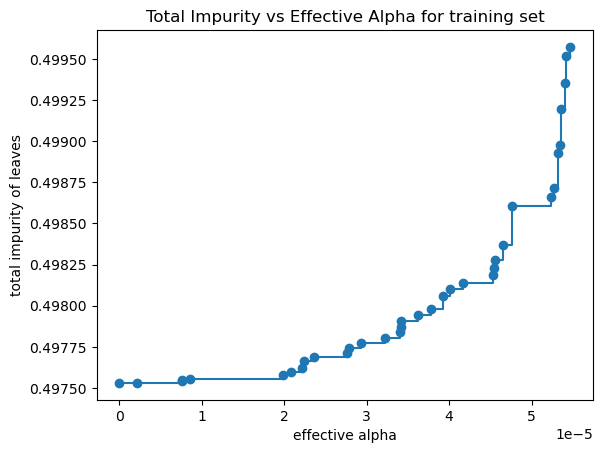

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Compute the cost-complexity pruning path
path = model_dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Create a new DecisionTreeClassifier with the optimal ccp_alpha
model_dt_pruned = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha)

# Fit the pruned tree
model_dt_pruned.fit(x_train, y_train)


In [35]:
y_pred1=model_dt_pruned.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
model_dt_pruned.score(x_test,y_test)

0.508

In [38]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54     15093
           1       0.50      0.41      0.45     14907

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [77]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [78]:
from sklearn.model_selection import GridSearchCV


In [79]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')


In [80]:
cv.fit(x_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [81]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [82]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [83]:
y_test

66720    0
55581    0
22342    1
64103    1
33677    0
        ..
91184    0
72147    0
87290    0
45447    0
91194    0
Name: Churn, Length: 20000, dtype: int64

In [84]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
y_pred=cv.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
score

0.50425

In [87]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65     18519
           1       0.08      0.52      0.13      1481

    accuracy                           0.50     20000
   macro avg       0.50      0.51      0.39     20000
weighted avg       0.87      0.50      0.61     20000



## Random Forest Classifier 

In [92]:
from sklearn.ensemble import RandomForestClassifier


In [93]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [94]:
y_pred=model_rf.predict(x_test)
model_rf.score(x_test,y_test)

0.5017

In [95]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.67      0.58     10026
           1       0.50      0.33      0.40      9974

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



## Performing PCA

In [96]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(x_train)
xr_test_pca = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [97]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(xr_train_pca,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [98]:
yr_predict_pca = model.predict(xr_test_pca)

In [99]:
model_score_r_pca = model.score(xr_test_pca, y_test)
print(model_score_r_pca)
print(metrics.classification_report(y_test, yr_predict_pca))

0.50165
              precision    recall  f1-score   support

           0       0.50      0.73      0.59     10026
           1       0.50      0.27      0.35      9974

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



In [101]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     --------- ----------------------------- 30.7/126.5 kB 1.3 MB/s eta 0:00:01
     ----------------------- ------------- 81.9/126.5 kB 762.6 kB/s eta 0:00:01
     -------------------------------- --- 112.6/126.5 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 126.5/126.5 kB 740.8 kB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3

## ANN

In [102]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [108]:
model = Sequential()

model.add(Dense(100,activation='sigmoid',input_dim=20))
model.add(Dense(80,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2100      
                                                                 
 dense_4 (Dense)             (None, 80)                8080      
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 10261 (40.08 KB)
Trainable params: 10261 (40.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [111]:
history = model.fit(x_train,y_train,batch_size=50,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6962 - accuracy: 0.5023 - val_loss: 0.6937 - val_accuracy: 0.4990
Epoch 2/15
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6950 - accuracy: 0.5024 - val_loss: 0.6952 - val_accuracy: 0.4992
Epoch 3/15
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6949 - accuracy: 0.4997 - val_loss: 0.6934 - val_accuracy: 0.4967
Epoch 4/15
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6946 - accuracy: 0.4983 - val_loss: 0.6950 - val_accuracy: 0.5008
Epoch 5/15
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6942 - accuracy: 0.5007 - val_loss: 0.6962 - val_accuracy: 0.4992
Epoch 6/15
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6940 - accuracy: 0.5026 - val_loss: 0.6947 - val_accuracy: 0.4992
Epoch 7/15
1280/1280 [==============================] - 2s 2ms/step - loss: 0.6941 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy:

In [113]:
y_pred = model.predict(x_test)
y_pred

625/625 [==============================] - 1s 981us/step


array([[0.4711545 ],
       [0.48826793],
       [0.49032685],
       ...,
       [0.48935494],
       [0.48916462],
       [0.49721754]], dtype=float32)

In [114]:
y_pred = y_pred.argmax(axis=-1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5013

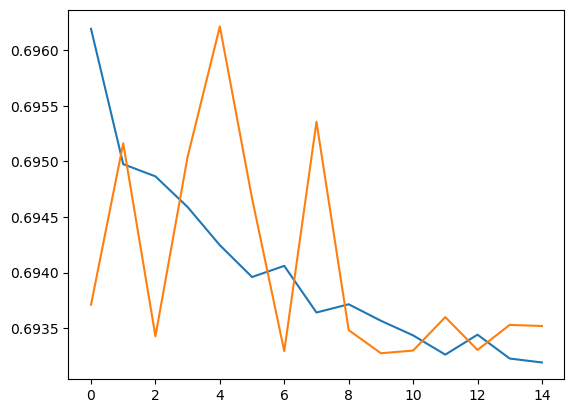

In [115]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

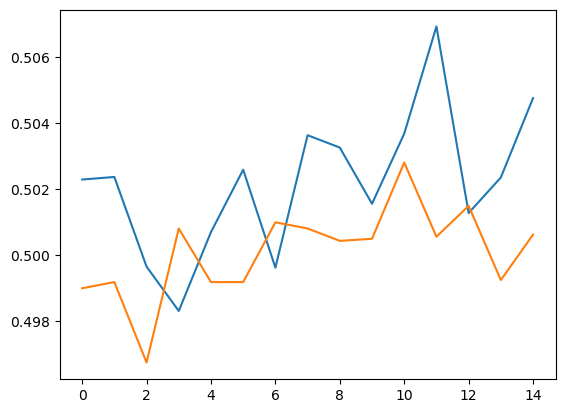

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### With PCA &ANN, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

## Pickling the model

In [117]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf, open(filename, 'wb'))


In [118]:
load_model = pickle.load(open(filename, 'rb'))


In [119]:
model_score_r1 = load_model.score(x_test, y_test)
model_score_r1

0.5017

#### Our final model i.e. RF Classifier , is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.